# Simple Linear Regression Model via manual calculations

The goal of the model is to predict salaries based on years of work experience. I created a neural network model by manually calculating the Gradient Descent and the cost function (MSE).

## 1. Read and plot data 
The first steip is to use the pandas package to read the datasets of work experience and salary. Then, those datasets will be plotted  via the matplotlib.pyplot package, and a prediction function (y=w*x+b) will follow.

In [1]:
import pandas as pd

data = pd.read_csv('Salary_Data.csv')

x = data["YearsExperience"]
y = data["Salary"]

data

,YearsExperience,Salary
0,0.3,36.2
1,0.6,36.6
2,0.8,42.8
3,1.1,39.3
4,1.3,46.2
5,1.5,37.7
6,2.0,43.5
7,2.2,39.8
8,2.9,56.6
9,3.0,60.1


In [2]:
import matplotlib.pyplot as plt
def plot_pred(w, b):
    y_pred = x*w + b
    plt.plot(x, y_pred, color="blue", label="Initial Prediction")
    plt.scatter(x, y, marker="x", color="red", label="Real data")
    plt.title("Work Experience VS Salary")
    plt.xlabel("Years")
    plt.ylabel("Salary (K)")
    plt.legend()
    plt.show()
    
    
from ipywidgets import interact
interact(plot_pred, w=(-100, 100, 1), b=(-100, 100, 1))

interactive(children=(IntSlider(value=0, description='w', min=-100), IntSlider(value=0, description='b', min=-…

<function __main__.plot_pred(w, b)>

## 2. Create a cost function: (real data - predicted data)^2
Designing a cost function, and calculating the average of all the costs

In [3]:
def compute_cost(x, y, w, b):
  y_predicted = w*x + b
  cost = (y - y_predicted)**2 #calculating the cost of every dataset.
  cost = cost.sum() / len(x) # Averaging the costs
  return cost

print(f"The initial cost function values when (w,b)=(10,10) is: {compute_cost(x, y, 10, 10)}")

The initial cost function values when (w,b)=(10,10) is: 227.88121212121214


## 2.1 Visualize costs with corresponding values of w and b

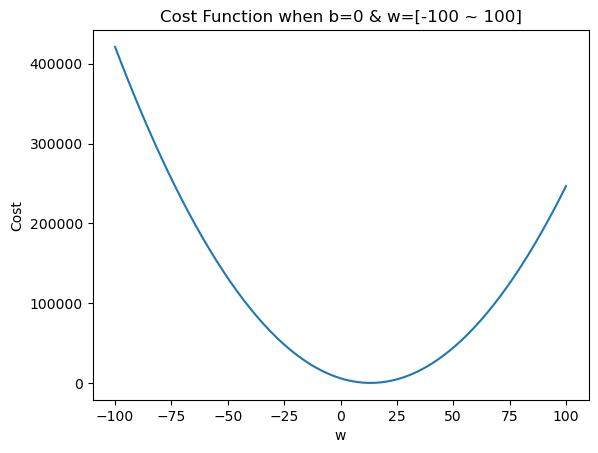

In [4]:
import matplotlib.pyplot as plt

costs = []
w_range = range(-100, 101)

for w in w_range:
  cost = compute_cost(x, y, w, 0)
  costs.append(cost)
    
# costs = [420951.08121212124, 413557.2063636363, ... ,246639.20242424245]

plt.plot(w_range, costs)
plt.title("Cost Function when b=0 & w=[-100 ~ 100]")
plt.xlabel("w")
plt.ylabel("Cost")
plt.show()

In [5]:
# w=-100~100 b=-100~100 的 cost
import numpy as np

# Creating sequences for the folloing loop iterations
ws = np.arange(-100, 101) 
bs = np.arange(-100, 101)
costs = np.zeros((201, 201))

i = 0
for w in ws:
  j = 0
  for b in bs:
    cost = compute_cost(x, y, w, b)
    costs[i,j] = cost
    j = j+1
  i = i+1

# costs = array([[543097.74787879, ... , 338735.00242424, 339765.2630303 ]])

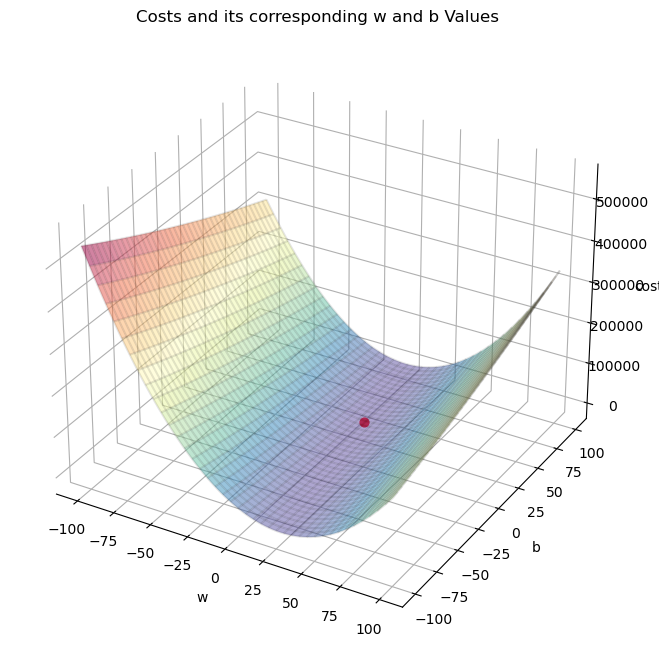

The optimmal w and b values are: 9 and 29, and the minimum cost is: 32.69


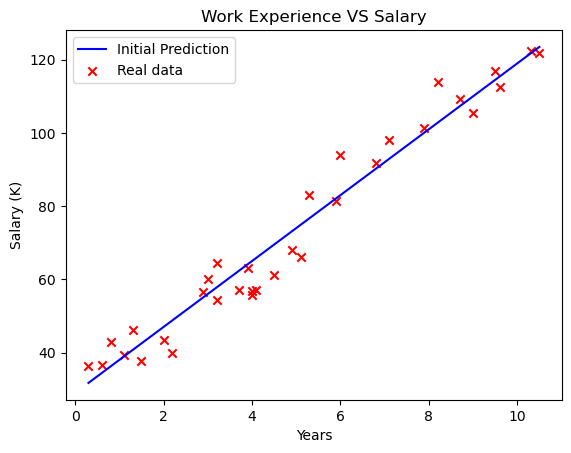

In [6]:
import matplotlib as mpl

plt.figure(figsize=(8, 8))
ax = plt.axes(projection="3d")
#ax.view_init(10, 0)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0))

b_grid, w_grid = np.meshgrid(bs, ws)
# https://wangyeming.github.io/2018/11/12/numpy-meshgrid/

ax.plot_surface(w_grid, b_grid, costs, cmap="Spectral_r", alpha=0.5)
ax.plot_wireframe(w_grid, b_grid, costs, color="black", alpha=0.1)

ax.set_title("Costs and its corresponding w and b Values")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("cost")

# Finding the values of w and b with the lowest cost
w_index, b_index = np.where(costs == np.min(costs))


ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color="red", s=40)

plt.show()

# Convert w_index and b_index to numbers using item()
w = ws[w_index].item()
b = bs[b_index].item()
minimal_cost = costs[w_index, b_index].item()


# Print the minimal cost and optimal w and b values
print(f"The optimmal w and b values are: {w} and {b}, and the minimum cost is: {round(minimal_cost, 2)}")
plot_pred(w, b)

# 3. Design a Gradient Descent function

1. The original cost function = (y - y_predicted)^2 = (y - (w*x + b))^2
2. The partial derivatives of the cost function with respect to w = -2*x*(y-(w*x+b))
3. The partial derivatives of the cost function with respect to b = -2*(y-(w*x+b))

The aim of the gradient descent here is to update the values of w and b. For example, the new w value =  w - w_gradient*learning_rate

## 3.1 Calculate the gradient values of w and b

In [7]:
# x = data["YearsExperience"]
# y = data["Salary"]

def compute_gradient(x, y, w, b):
    w_gradient = (-2*x*(y-(w*x+b))).sum() / len(x) # Calculate the average of gradient values for w
    b_gradient = (-2*(y-(w*x+b))).sum() / len(x)   # Calculate the average of gradient values for b
    return w_gradient, b_gradient

print(f"The gradient values of w and b when (w,b) = (20,10) is: {compute_gradient(x, y, 20, 10)}")

The gradient values of w and b when (w,b) = (20,10) is: (537.0951515151515, 70.16969696969697)


## 3.2 Design a gradient descent with a learning rate
In this part, a learning rate is added to update the values of w and b.

In [8]:
# Explanation of how a learning rate works
w = 0
b = 0
w_gradient, b_gradient = compute_gradient(x, y, w, b)
print(f"Without a learning rate, the original cost value is: {round(compute_cost(x, y, w, b),2)}.")

learning_rate = 0.001
w = w - w_gradient * learning_rate
b = b - b_gradient * learning_rate
print(f"With a learning rate, the new cost value is: {round(compute_cost(x, y, w, b),2)}.")
print(f"Based on the testing above, a learning rate can help lower the cost value.")

Without a learning rate, the original cost value is: 6040.6.
With a learning rate, the new cost value is: 5286.08.
Based on the testing above, a learning rate can help lower the cost value.


In [9]:
# p_iter aims to show the result per 1000 iterations.
# w_init and b_init are initial values of w and b.

def gradient_descent(x, y, w_init, b_init, learning_rate, cost_function, gradient_function, run_iter, p_iter=1000):
    
    c_hist = []  # Store costs in each iteration
    w_hist = []  # Store w values in each iteration
    b_hist = []  # Store b values in each iteration
    
    w = w_init
    b = b_init

    for i in range(run_iter):
        w_gradient, b_gradient = compute_gradient(x, y, w, b)
        w = w - w_gradient*learning_rate  # Updating the w value via a learning rate
        b = b - b_gradient*learning_rate  # Updating the b value via a learning rate
        cost = cost_function(x, y, w, b)

        w_hist.append(w)
        b_hist.append(b)
        c_hist.append(cost)
        if i%p_iter == 0: 
            print(f"Iteration {i:5} || Cost: {round(cost,2):8}, w: {round(w,2):5}, b: {round(b,2):5}, w_gradient: {round(w_gradient,3):8}, b_gradient: {round(b_gradient,3):5}")
    
    return w, b, w_hist, b_hist, c_hist


In [10]:
w_init = 0
b_init = 0
learning_rate = float(input("Please enter your learning rate: "))
run_iter = int(input("Please enter your ilerations: "))
print("")

w_final, b_final, w_hist, b_hist, c_hist = gradient_descent(x, y, w_init, b_init, learning_rate, compute_cost, compute_gradient, run_iter)


Please enter your learning rate: 0.001
Please enter your ilerations: 30000

Iteration     0 || Cost:  5286.08, w:  0.87, b:  0.15, w_gradient: -871.559, b_gradient: -145.103
Iteration  1000 || Cost:    96.02, w: 11.42, b: 12.74, w_gradient:    1.224, b_gradient: -8.154
Iteration  2000 || Cost:    54.28, w: 10.47, b: 19.06, w_gradient:    0.718, b_gradient: -4.78
Iteration  3000 || Cost:    39.93, w:  9.91, b: 22.76, w_gradient:    0.421, b_gradient: -2.803
Iteration  4000 || Cost:    34.99, w:  9.59, b: 24.93, w_gradient:    0.247, b_gradient: -1.643
Iteration  5000 || Cost:     33.3, w:  9.39, b: 26.21, w_gradient:    0.145, b_gradient: -0.963
Iteration  6000 || Cost:    32.72, w:  9.28, b: 26.95, w_gradient:    0.085, b_gradient: -0.565
Iteration  7000 || Cost:    32.51, w:  9.22, b: 27.39, w_gradient:     0.05, b_gradient: -0.331
Iteration  8000 || Cost:    32.45, w:  9.18, b: 27.65, w_gradient:    0.029, b_gradient: -0.194
Iteration  9000 || Cost:    32.42, w:  9.16, b:  27.8, w_gr

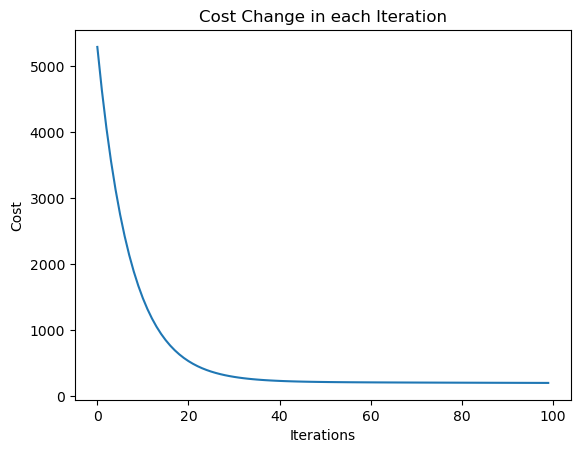

After 30000 iterations, the ultimate values of w and b are: 9.12 and 28.01.
The cost can be reduced to: 32.69.


In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0, 100), c_hist[:100])
plt.title("Cost Change in each Iteration")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

print(f"After {run_iter} iterations, the ultimate values of w and b are: {round(w_final,2)} and {round(b_final,2)}.")
print(f"The cost can be reduced to: {round(minimal_cost,2)}.")

# 4. Calculate the accuracy of the simple linear regression model above
1. Calcuate the Coefficient of Determination (R^2) between predicted and real y values.

In [12]:
list_of_y_predicted = []
for i in x:
    y_predicted = w_final * i + b_final
    y_predicted = round(y_predicted, 1)
    # print(y_predicted)
    list_of_y_predicted.append(y_predicted)
print("The following list contains predicted y values with optimal w and b values:")
print(list_of_y_predicted)

The following list contains predicted y values with optimal w and b values:
[30.7, 33.5, 35.3, 38.0, 39.9, 41.7, 46.3, 48.1, 54.5, 55.4, 57.2, 57.2, 61.8, 63.6, 64.5, 64.5, 65.4, 69.1, 72.7, 74.5, 76.4, 81.8, 82.8, 90.1, 92.8, 100.1, 102.8, 107.4, 110.1, 114.7, 115.6, 122.0, 123.8]


In [13]:
import numpy as np

y_real = y                              #Load original real y data
y_pred = np.array(list_of_y_predicted)

# Coefficient of Determination (R^2)
ss_total = np.sum((y_real - np.mean(y_real)) ** 2)
ss_residual = np.sum((y_real - y_pred) ** 2)
r2_score = (1 - (ss_residual / ss_total)) 
r2_score = round(r2_score, 3)
print(f"The R^2 score of the simple linear regression model above is about: {r2_score}.")

The R^2 score of the simple linear regression model above is about: 0.958.


# Conclusion
In this trial, after 30,000 epochs, the optimal weight and optimal bias value are about 9.12 and 28.01, respectively. With 32 salary datasets, the  Coefficient of Determination (R^2) score of this model is estimated to be about 95.8%.